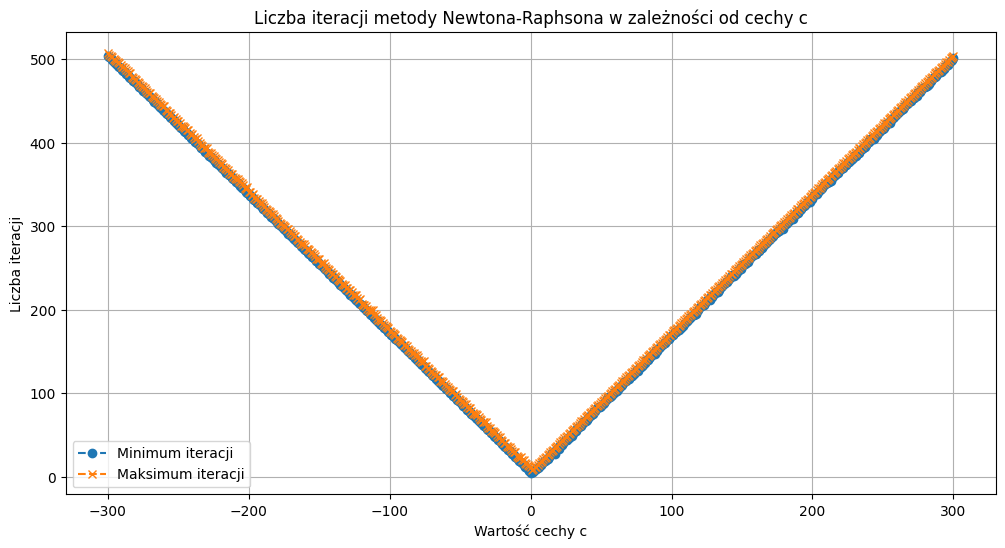

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

def newton_raphson_sqrt (a, x0=None, max_iter=1e5):

    if a< 0:
        return "Błąd"
    if x0==None:
        x_n=a
    else:
        x_n=x0

    iteration=0
    while iteration<max_iter:
        x_n_1 = (x_n + (a/x_n))/2
        iteration +=1
        if x_n_1 - x_n == 0:
            return x_n_1, iteration
        x_n=x_n_1
    return 'Nie osiągnięto odpowiedniej dokładnośći'
    
def monte_carlo_sqrt_iterations(num_samples=100, c_range=range(-300, 301)):
    
    results = {}
    for c in c_range:
        iterations = []
        for _ in range(num_samples):
            m = random.random()
            a = m * (10**c)
            result, iter_count = newton_raphson_sqrt(a, x0=a)
            if result is not None: 
                iterations.append(iter_count)

        if iterations:
            results[c] = (min(iterations), max(iterations))
        else:
            results[c] = (np.nan, np.nan) 

    return results

results_task1 = monte_carlo_sqrt_iterations(num_samples=100)

c_values = sorted(results_task1.keys())
min_iters = [results_task1[c][0] for c in c_values]
max_iters = [results_task1[c][1] for c in c_values]

plt.figure(figsize=(12, 6))
plt.plot(c_values, min_iters, label='Minimum iteracji', marker='o', linestyle='--')
plt.plot(c_values, max_iters, label='Maksimum iteracji', marker='x', linestyle='--')
plt.xlabel('Wartość cechy c')
plt.ylabel('Liczba iteracji')
plt.title('Liczba iteracji metody Newtona-Raphsona w zależności od cechy c')
plt.legend()
plt.grid(True)
plt.show()
